**HEALTH CARE
*My Health buddy***

In [1]:
#importing the various libraries to be used
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import BatchNormalization
from keras.regularizers import l2
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

**Dataset from Kaggle importation**

In [2]:
#loading the data set
import pandas as pd

dataset_df = pd.read_csv('/content/dataset.csv')

Data Exploration and Cleaning

In [3]:
#displaying the dataset
dataset_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#getting information about the dataset
dataset_df.shape
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
#getting the null values
dataset_df.isna().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348
Symptom_5,1206
Symptom_6,1986
Symptom_7,2652
Symptom_8,2976
Symptom_9,3228


In [6]:
#Dropping unwanted columns
col_drop = ['Symptom_12', 'Symptom_13','Symptom_14','Symptom_15','Symptom_16','Symptom_17']
dataset_df = dataset_df.drop(columns=col_drop)

In [7]:
dataset_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN


In [8]:
#Getting unique Diseases
Disease = dataset_df['Disease'].unique()
Disease

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
#number of unique diseases
len(Disease)

41

In [10]:
columns = dataset_df.columns[1:]
columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11'],
      dtype='object')

In [11]:
#Getting unique sypmtoms
symptoms = pd.unique(dataset_df[columns].values.ravel())
symptoms

array(['itching', ' skin_rash', ' nodal_skin_eruptions',
       ' dischromic _patches', nan, ' continuous_sneezing', ' shivering',
       ' chills', ' watering_from_eyes', ' stomach_pain', ' acidity',
       ' ulcers_on_tongue', ' vomiting', ' cough', ' chest_pain',
       ' yellowish_skin', ' nausea', ' loss_of_appetite',
       ' abdominal_pain', ' yellowing_of_eyes', ' burning_micturition',
       ' spotting_ urination', ' passage_of_gases', ' internal_itching',
       ' indigestion', ' muscle_wasting', ' patches_in_throat',
       ' high_fever', ' extra_marital_contacts', ' fatigue',
       ' weight_loss', ' restlessness', ' lethargy',
       ' irregular_sugar_level', ' blurred_and_distorted_vision',
       ' obesity', ' excessive_hunger', ' increased_appetite',
       ' polyuria', ' sunken_eyes', ' dehydration', ' diarrhoea',
       ' breathlessness', ' family_history', ' mucoid_sputum',
       ' headache', ' dizziness', ' loss_of_balance',
       ' lack_of_concentration', ' stiff

In [12]:
#getting the number of symptoms
len(symptoms)

127

In [13]:
#converting symptoms names to numerical values for model training and testing
label_encoder = LabelEncoder()
symp = label_encoder.fit_transform(symptoms)
symp

array([125,  95,  69,  30, 126,  23,  91,  18, 116, 101,   2, 112, 115,
        24,  17, 124,  67,  57,   0, 123,  16,  99,  76,  49,  47,  65,
        77,  43,  36,  39, 120,  88,  56,  50,  12,  70,  35,  46,  79,
       102,  27,  29,  13,  37,  63,  42,  32,  58,  55, 100,  28,  51,
       114,   6, 117,  68, 118,   4,  26, 103,  64,  60, 104,  59,  86,
        53,  71,  21, 111,   7, 122,  83,  84,  20,   3, 106,  31,  45,
        40,  78, 110,  87,  93,  38,  89,  72,  73,  11,  52,  25,  15,
       109, 107,  80, 119,  19,  61,  81,  34,  14, 108,  66,   1,   5,
        96,  75,  33,  54,  44, 105,  74,  62,  98, 113,  82,   8,  90,
         9,  41,  22,  94,  92,  97,  48,  10,  85, 121])

In [14]:
#Creating a dictionary that stores different symptoms and their arrays
encodedSymp = dict(zip(symptoms, symp))
encodedSymp

{'itching': np.int64(125),
 ' skin_rash': np.int64(95),
 ' nodal_skin_eruptions': np.int64(69),
 ' dischromic _patches': np.int64(30),
 nan: np.int64(126),
 ' continuous_sneezing': np.int64(23),
 ' shivering': np.int64(91),
 ' chills': np.int64(18),
 ' watering_from_eyes': np.int64(116),
 ' stomach_pain': np.int64(101),
 ' acidity': np.int64(2),
 ' ulcers_on_tongue': np.int64(112),
 ' vomiting': np.int64(115),
 ' cough': np.int64(24),
 ' chest_pain': np.int64(17),
 ' yellowish_skin': np.int64(124),
 ' nausea': np.int64(67),
 ' loss_of_appetite': np.int64(57),
 ' abdominal_pain': np.int64(0),
 ' yellowing_of_eyes': np.int64(123),
 ' burning_micturition': np.int64(16),
 ' spotting_ urination': np.int64(99),
 ' passage_of_gases': np.int64(76),
 ' internal_itching': np.int64(49),
 ' indigestion': np.int64(47),
 ' muscle_wasting': np.int64(65),
 ' patches_in_throat': np.int64(77),
 ' high_fever': np.int64(43),
 ' extra_marital_contacts': np.int64(36),
 ' fatigue': np.int64(39),
 ' weight_lo

In [15]:
#Mapping the different arrays to their symptoms
for col in columns:
    dataset_df[col] = dataset_df[col].map(encodedSymp)

In [16]:
dataset_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,Fungal infection,125,95,69,30,126,126,126,126,126,126,126
1,Fungal infection,95,69,30,126,126,126,126,126,126,126,126
2,Fungal infection,125,69,30,126,126,126,126,126,126,126,126
3,Fungal infection,125,95,30,126,126,126,126,126,126,126,126
4,Fungal infection,125,95,69,126,126,126,126,126,126,126,126
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,115,42,67,98,58,113,126,126,126,126,126
4916,Acne,95,82,8,90,126,126,126,126,126,126,126
4917,Urinary tract infection,16,9,41,22,126,126,126,126,126,126,126
4918,Psoriasis,95,53,94,92,97,48,126,126,126,126,126


In [17]:
#Converting disease column to numerical values
dataset_df['Disease'] = label_encoder.fit_transform(dataset_df['Disease'])

In [18]:
dataset_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
0,15,125,95,69,30,126,126,126,126,126,126,126
1,15,95,69,30,126,126,126,126,126,126,126,126
2,15,125,69,30,126,126,126,126,126,126,126,126
3,15,125,95,30,126,126,126,126,126,126,126,126
4,15,125,95,69,126,126,126,126,126,126,126,126
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,115,42,67,98,58,113,126,126,126,126,126
4916,2,95,82,8,90,126,126,126,126,126,126,126
4917,38,16,9,41,22,126,126,126,126,126,126,126
4918,35,95,53,94,92,97,48,126,126,126,126,126


In [19]:
#Dropped Disease column to separate the target and the features
X = dataset_df.drop('Disease', axis=1)# new dataset containing the features
y = dataset_df['Disease'] #New dataset containing the target

In [20]:
y

,Disease
0,15
1,15
2,15
3,15
4,15
...,...
4915,0
4916,2
4917,38
4918,35


In [21]:
#Determining the frequency of different sypmtoms
class_counts = y.value_counts()
print(class_counts)

Disease
15    120
4     120
16    120
9     120
14    120
33    120
1     120
12    120
17    120
6     120
23    120
30    120
7     120
32    120
28    120
29    120
8     120
11    120
37    120
40    120
19    120
20    120
21    120
22    120
3     120
36    120
10    120
34    120
13    120
18    120
39    120
26    120
24    120
25    120
31    120
5     120
0     120
2     120
38    120
35    120
27    120
Name: count, dtype: int64


In [22]:
#One-hot encoding
#Conversion to binary
y = to_categorical(y, num_classes=len(dataset_df['Disease'].unique()))

In [23]:
y.shape

(4920, 41)

Building Models and visualizing their results

In [24]:
#Data splitting for model training and evaluation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [25]:
X_train

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
682,18,39,24,43,13,103,59,78,17,38,89
3963,18,39,24,43,13,103,59,78,17,38,89
3126,42,17,32,58,55,126,126,126,126,126,126
4480,2,47,42,12,35,100,28,51,114,126,126
3411,115,102,27,29,126,126,126,126,126,126,126
...,...,...,...,...,...,...,...,...,...,...,...
4426,95,53,94,92,97,48,126,126,126,126,126
466,115,47,57,0,49,126,126,126,126,126,126
3092,95,18,53,115,39,43,42,67,57,71,6
3772,125,95,69,30,126,126,126,126,126,126,126


In [26]:
X_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11
4094,66,100,105,62,74,126,126,126,126,126,126
3824,2,47,42,12,35,100,28,51,114,126,126
330,115,39,5,103,42,67,12,35,96,51,75
2117,77,43,36,126,126,126,126,126,126,126,126
999,95,18,53,115,39,42,67,57,71,6,59
...,...,...,...,...,...,...,...,...,...,...,...
2464,125,95,101,16,99,126,126,126,126,126,126
4754,95,53,94,92,97,48,126,126,126,126,126
2118,65,43,36,126,126,126,126,126,126,126,126
1116,115,13,103,17,126,126,126,126,126,126,126


In [27]:
y_test.shape

(296, 41)

In [28]:
y_train.shape

(3444, 41)

In [29]:
#Building and training Decison Tree Classifier Model
DT_model= DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [10], 'min_samples_split': [10],'min_samples_leaf': [5],'max_features': ['sqrt'] # Number of features to consider when looking for the best split
}

In [30]:
# Getting  the best model using Grid Search
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_DT_model = grid_search.best_estimator_


In [31]:
# Evaluate the best Decision Tree model
y_pred_dt = best_DT_model.predict(X_test)

# Get the predicted class labels (instead of probabilities)
y_pred_dt_classes = np.argmax(y_pred_dt, axis=1)

# Inverse transform the predicted class labels back to original disease names
y_pred_dt_original = label_encoder.inverse_transform(y_pred_dt_classes)

# Inverse transform the true labels back to original disease names
y_test_original = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

# Print classification report for the best Decision Tree model
print(classification_report(y_test_original, y_pred_dt_original))



                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.18      1.00      0.31         4
                                   AIDS       1.00      0.71      0.83         7
                                   Acne       0.67      0.86      0.75         7
                    Alcoholic hepatitis       1.00      1.00      1.00         5
                                Allergy       1.00      1.00      1.00         4
                              Arthritis       1.00      0.56      0.71         9
                       Bronchial Asthma       1.00      1.00      1.00        15
                   Cervical spondylosis       1.00      1.00      1.00         4
                            Chicken pox       1.00      1.00      1.00        10
                    Chronic cholestasis       0.56      1.00      0.71         5
                            Common Cold       1.00      0.90      0.95        10
                           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


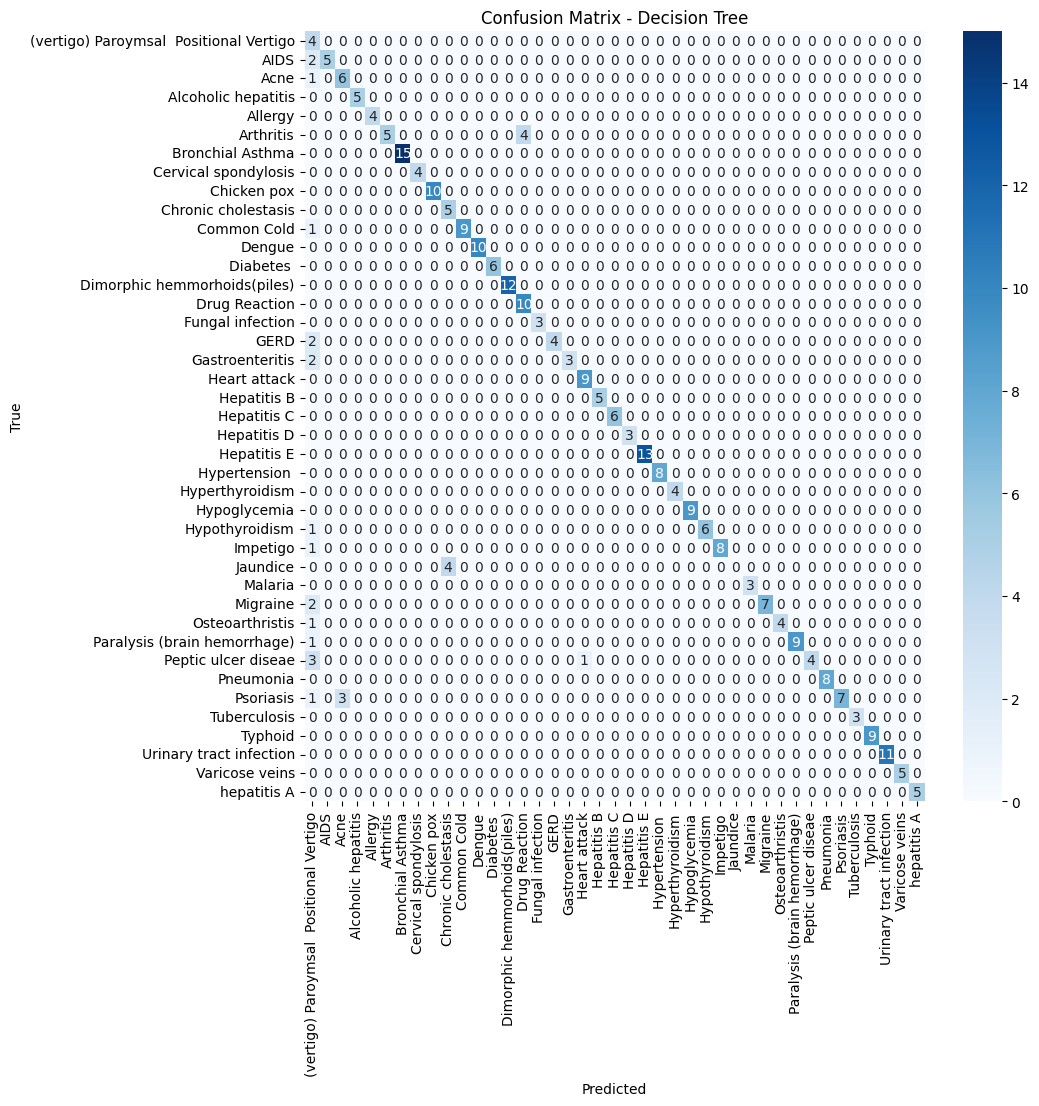

In [32]:
# Print confusion matrix for the best Decision Tree model
cm_dt = confusion_matrix(y_test_original, y_pred_dt_original)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [33]:
#Building and training the sequential model
sq_model = Sequential()

sq_model.add(Input(shape=(X_train.shape[1],)))

sq_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.02)))
sq_model.add(BatchNormalization())

sq_model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.02)))
sq_model.add(BatchNormalization())

sq_model.add(Dense(y_train.shape[1], activation='softmax'))

optimizer = Adam(learning_rate=0.0005)
sq_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
#Ensuring the model doesnt master one training and also focuses on new situations
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [35]:
sq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,585 (17.91 KB)

 Trainable params: 4,393 (17.16 KB)

 Non-trainable params: 192 (768.00 B)

In [36]:
 #Actual Training of the model
history = sq_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0473 - loss: 4.9845 - val_accuracy: 0.1068 - val_loss: 4.9733
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3196 - loss: 3.9416 - val_accuracy: 0.2729 - val_loss: 3.7747
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5383 - loss: 3.3213 - val_accuracy: 0.5703 - val_loss: 3.1308
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6682 - loss: 2.8203 - val_accuracy: 0.7000 - val_loss: 2.7456
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7546 - loss: 2.4550 - val_accuracy: 0.7339 - val_loss: 2.4068
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7868 - loss: 2.1443 - val_accuracy: 0.7712 - val_loss: 2.1528
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8097 - loss: 1.8744 - val_accuracy: 0.8093 - val_loss: 1.9521
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8369 - loss: 1.6750 - val_accuracy: 0.8305 - val_loss

In [37]:
#Model's performance
test_loss, test_accuracy = sq_model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9873 - loss: 0.2813 
Test loss: 0.2965794503688812
Test accuracy: 0.9797297120094299


In [38]:
#Prediction based on the model's performance
y_pred = sq_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         5
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         9
           6       1.00      0.93      0.97        15
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        10
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.

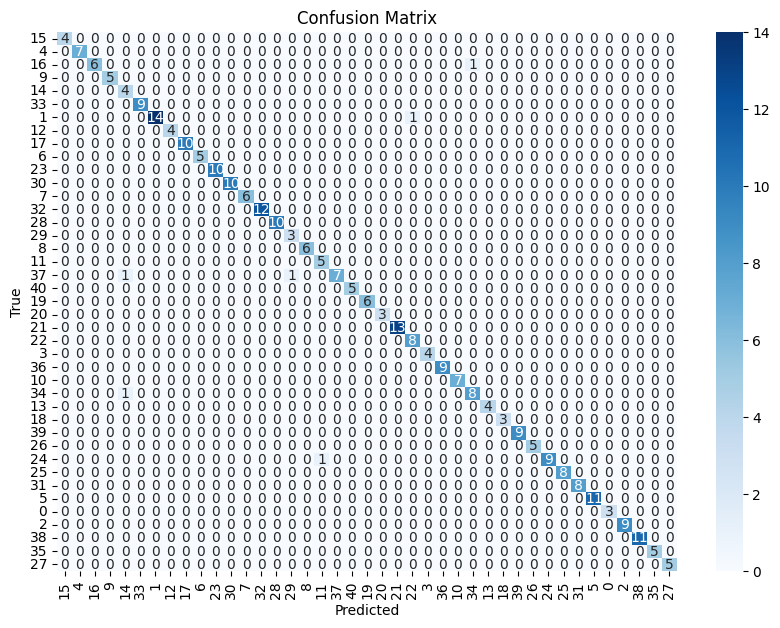

In [39]:
#Creating a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=dataset_df['Disease'].unique(), yticklabels=dataset_df['Disease'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

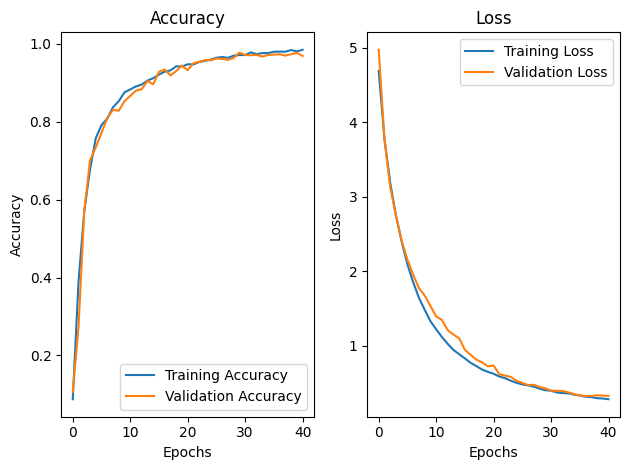

In [40]:
#Viualizing model performance
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

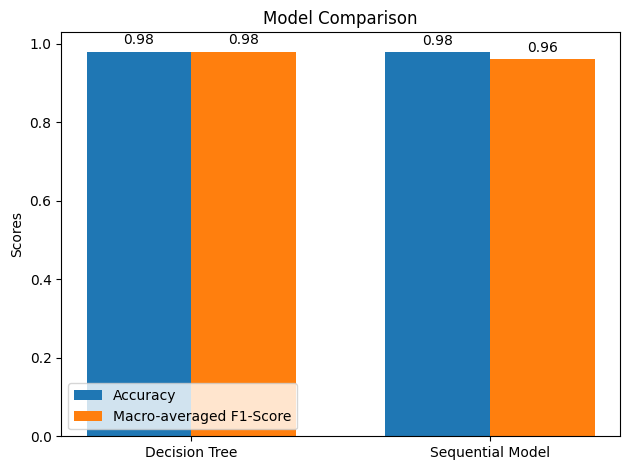

In [41]:
#comparing the two models
models = ['Decision Tree', 'Sequential Model']
accuracies = [0.98, test_accuracy]
f1_scores_avg = [0.98, 0.96]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores_avg, width, label='Macro-averaged F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
